In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("00_files/02-multiple_grades_dataset.csv")

In [3]:
df.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
0,4.7,7.3,82.9,3.3,80.7
1,3.8,6.6,87.9,3.3,76.0
2,5.0,6.3,88.3,2.3,89.1
3,6.3,7.6,86.0,3.2,95.9
4,3.6,8.0,89.2,3.3,70.5


In [4]:
df.describe()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
count,50.00000,50.000000,50.000000,50.00000,50.00000
mean,3.66800,7.022000,89.736000,3.09000,76.07000
std,1.40123,0.874419,4.924813,0.89699,11.70915
min,1.10000,4.400000,80.400000,1.50000,56.90000
25%,2.67500,6.500000,85.625000,2.22500,68.07500
50%,3.60000,7.050000,90.100000,3.20000,73.55000
75%,4.50000,7.575000,92.550000,3.57500,84.17500
max,6.80000,8.600000,100.000000,5.70000,100.00000


In [5]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Study Hours         50 non-null     float64
 1   Sleep Hours         50 non-null     float64
 2   Attendance Rate     50 non-null     float64
 3   Social Media Hours  50 non-null     float64
 4   Exam Score          50 non-null     float64
dtypes: float64(5)
memory usage: 2.1 KB


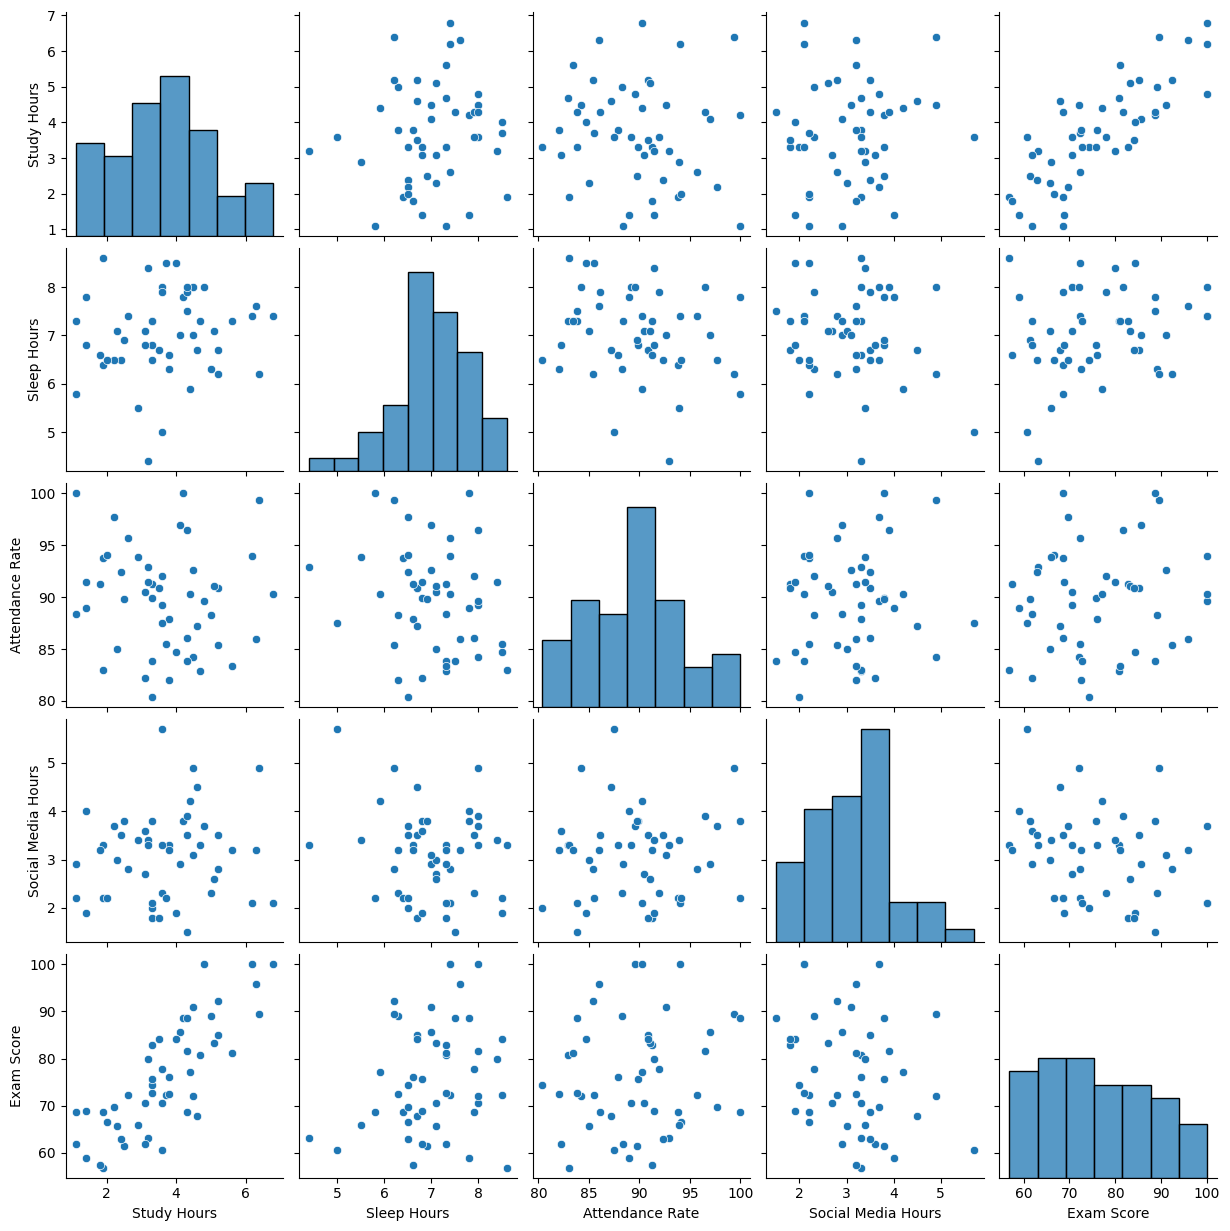

In [6]:
sns.pairplot(df)
plt.show()

In [7]:
df.corr()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours,Exam Score
Study Hours,1.000000,0.114015,-0.112860,0.115023,0.804266
Sleep Hours,0.114015,1.000000,-0.222024,-0.177166,0.227694
Attendance Rate,-0.112860,-0.222024,1.000000,0.068272,0.123791
Social Media Hours,0.115023,-0.177166,0.068272,1.000000,-0.248743
Exam Score,0.804266,0.227694,0.123791,-0.248743,1.000000


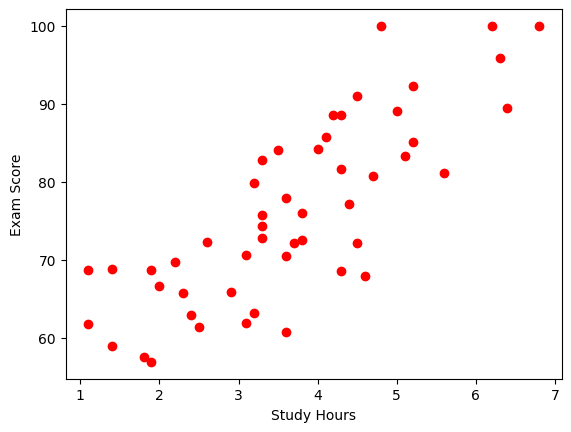

In [8]:
plt.scatter(df["Study Hours"], df["Exam Score"], color="r")
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")

plt.show()

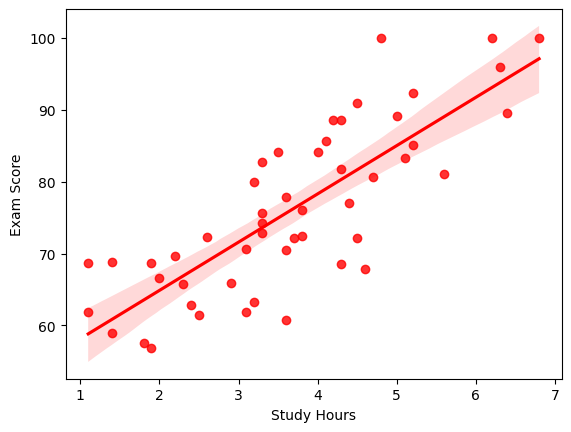

In [9]:
sns.regplot(x = df["Study Hours"], y = df["Exam Score"], color="r")
plt.show()

In [10]:
# independent and dependent features
X = df.iloc[:,:-1] # select all rows and all columns except the last one (features)
y = df.iloc[:,-1] # select all rows of the last column (target variable)

# X = df[["Study Hours", "Sleep Hours", "Attendance Rate", "Social Media Hours"]]
# y = df[["Examn Score"]

In [11]:
X.head()

,Study Hours,Sleep Hours,Attendance Rate,Social Media Hours
0,4.7,7.3,82.9,3.3
1,3.8,6.6,87.9,3.3
2,5.0,6.3,88.3,2.3
3,6.3,7.6,86.0,3.2
4,3.6,8.0,89.2,3.3


In [12]:
y.head()

0    80.7
1    76.0
2    89.1
3    95.9
4    70.5
Name: Exam Score, dtype: float64

In [13]:
# train - test - split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=15)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
from sklearn.linear_model import LinearRegression

In [20]:
regression = LinearRegression()

In [21]:
regression.fit(X_train, y_train)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [22]:
df.iloc[0]

Study Hours            4.7
Sleep Hours            7.3
Attendance Rate       82.9
Social Media Hours     3.3
Exam Score            80.7
Name: 0, dtype: float64

In [23]:
new_student = pd.DataFrame([[5, 7, 90, 2]], columns=["Study Hours", "Sleep Hours", "Attendance Rate", "Social Media Hours"])

In [24]:
new_student_scaled = scaler.transform(new_student)

In [25]:
regression.predict(new_student_scaled)

array([90.88471349])

In [26]:
# prediction

In [27]:
y_pred = regression.predict(X_test)

In [28]:
y_pred

array([ 67.04704385,  57.90545589,  83.63084813,  63.69399367,
        69.73079557,  80.76485587,  93.76445033,  65.93953528,
        64.58675718,  78.42296106,  56.67860558,  64.44046585,
       102.60438643])

In [29]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [30]:
mse = mean_squared_error(y_test, y_pred) # average of squared errors (penalizes big mistakes more)
mae = mean_absolute_error(y_test, y_pred) # average of absolute differences between real and predicted values
rmse = np.sqrt(mse) # square root of MSE (error in same unit as target)
r2score = r2_score(y_test, y_pred) # measures how well the model explains the variance (goodness of fit)
r2adjustedscore = 1 - (1-r2score) * (len(y_test) -1) / (len(y_test) - X_test.shape[1] -1) # adjusted r2 score

print("mse : ", mse)
print("mae : ", mae)
print("rmse : ", rmse)
print("r2 score : ", r2score)
print("r2 adjusted score :", r2adjustedscore) 

mse :  14.600589378986273
mae :  3.277026485962789
rmse :  3.8210717578954565
r2 score :  0.9156707345772709
r2 adjusted score : 0.8735061018659063


In [31]:
residuals = y_test - y_pred

In [32]:
print(residuals)

35    2.652956
37    3.894544
41   -1.930848
26    2.006006
38   -3.130796
43    3.335144
3     2.135550
33   -3.039535
30   -2.686757
36   -9.822961
14    2.321394
16   -3.040466
20   -2.604386
Name: Exam Score, dtype: float64


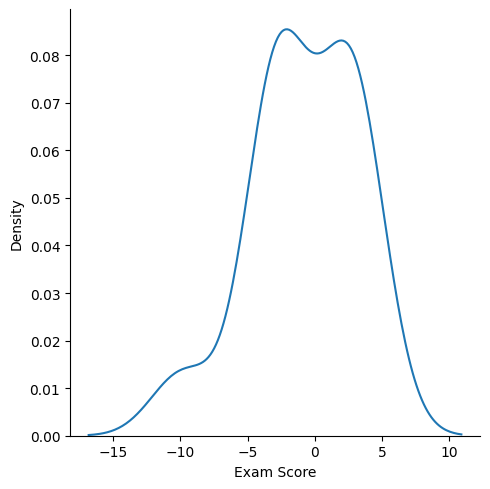

In [33]:
sns.displot(residuals, kind="kde")
plt.show()

In [34]:
regression.intercept_

np.float64(77.41081081081082)

In [35]:
regression.coef_

array([ 9.28014703,  1.78967062,  3.24340001, -4.08127695])

In [36]:
students = pd.DataFrame([
    [6, 8, 87, 4],
    [4, 6, 94, 5],
    [2, 5, 76, 3]
],
columns=["Study Hours", "Sleep Hours", "Attendance Rate", "Social Media Hours"])

In [37]:
regression.predict(scaler.transform(students))

array([89.50473603, 71.28857922, 51.70254529])